In [1]:
import pandas as pd
import numpy as np
%matplotlib inline

In [2]:
#open and read file
df = pd.read_excel("framingham_dataset.xlsx")

In [3]:
#explore
df.head()

,id,sex,sbp,dbp,scl,age,bmi,month,followup,chdfate
0,2642,1,120,80,267.0,55,25.0,8,18,1
1,4627,1,130,78,192.0,53,28.4,12,35,1
2,2568,1,144,90,207.0,61,25.1,8,109,1
3,4192,1,92,66,231.0,48,26.2,11,147,1
4,3977,1,162,98,271.0,39,28.4,11,169,1


In [ ]:
#goal = predict CHF outcome/fate

In [4]:
#look at dtypes. all need to be int
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4699 entries, 0 to 4698
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        4699 non-null   int64  
 1   sex       4699 non-null   int64  
 2   sbp       4699 non-null   int64  
 3   dbp       4699 non-null   int64  
 4   scl       4666 non-null   float64
 5   age       4699 non-null   int64  
 6   bmi       4690 non-null   float64
 7   month     4699 non-null   int64  
 8   followup  4699 non-null   int64  
 9   chdfate   4699 non-null   int64  
dtypes: float64(2), int64(8)
memory usage: 367.2 KB


In [8]:
#look for missing values
df.isnull().sum()

id           0
sex          0
sbp          0
dbp          0
scl         33
age          0
bmi          9
month        0
followup     0
chdfate      0
dtype: int64

In [9]:
#locate missing values for scl
qry = "scl == True"
df.isnull().query(qry)

,id,sex,sbp,dbp,scl,age,bmi,month,followup,chdfate
131,False,False,False,False,True,False,False,False,False,False
363,False,False,False,False,True,False,False,False,False,False
391,False,False,False,False,True,False,False,False,False,False
432,False,False,False,False,True,False,False,False,False,False
589,False,False,False,False,True,False,False,False,False,False
644,False,False,False,False,True,False,False,False,False,False
725,False,False,False,False,True,False,False,False,False,False
772,False,False,False,False,True,False,True,False,False,False
1004,False,False,False,False,True,False,False,False,False,False
1357,False,False,False,False,True,False,False,False,False,False


In [10]:
#replace missing values with the mean
df["scl"].fillna(df["scl"].mean(), inplace = True)

In [17]:
#locate missing values for bmi
qry1 = "bmi == True"
df.isnull().query(qry1)

,id,sex,sbp,dbp,scl,age,bmi,month,followup,chdfate
67,False,False,False,False,False,False,True,False,False,False
425,False,False,False,False,False,False,True,False,False,False
519,False,False,False,False,False,False,True,False,False,False
772,False,False,False,False,False,False,True,False,False,False
795,False,False,False,False,False,False,True,False,False,False
1340,False,False,False,False,False,False,True,False,False,False
2187,False,False,False,False,False,False,True,False,False,False
2844,False,False,False,False,False,False,True,False,False,False
3162,False,False,False,False,False,False,True,False,False,False


In [18]:
#replace missing values with the mean
df["bmi"].fillna(df["bmi"].mean(), inplace = True)

In [19]:
#make both data types into int from float
df["scl"] = df["scl"].astype(int)
df["bmi"] = df["bmi"].astype(int)

In [20]:
#check that dtype conversion worked
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4699 entries, 0 to 4698
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   id        4699 non-null   int64
 1   sex       4699 non-null   int64
 2   sbp       4699 non-null   int64
 3   dbp       4699 non-null   int64
 4   scl       4699 non-null   int64
 5   age       4699 non-null   int64
 6   bmi       4699 non-null   int64
 7   month     4699 non-null   int64
 8   followup  4699 non-null   int64
 9   chdfate   4699 non-null   int64
dtypes: int64(10)
memory usage: 367.2 KB


array([[<AxesSubplot:title={'center':'id'}>,
        <AxesSubplot:title={'center':'sex'}>,
        <AxesSubplot:title={'center':'sbp'}>],
       [<AxesSubplot:title={'center':'dbp'}>,
        <AxesSubplot:title={'center':'scl'}>,
        <AxesSubplot:title={'center':'age'}>],
       [<AxesSubplot:title={'center':'bmi'}>,
        <AxesSubplot:title={'center':'month'}>,
        <AxesSubplot:title={'center':'followup'}>],
       [<AxesSubplot:title={'center':'chdfate'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

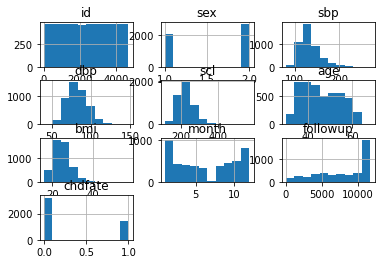

In [27]:
#look for outliers -- ran out of time to do this / scale and center data
df.hist()

In [21]:
#define X and y
X = df[["sex", "sbp","dbp","scl","age","bmi","followup"]]
y = df[["chdfate"]]

In [22]:
#split X and y
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.20, random_state=1)

In [34]:
#train and fit model
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors = 5)
model.fit(X_train,y_train)

<ipython-input-34-da33f1654873>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  model.fit(X_train,y_train)


KNeighborsClassifier()

In [35]:
y_pred = model.predict(X_test)

In [36]:
#test accuracy
from sklearn import metrics
print(metrics.accuracy_score(y_test,y_pred))
print(metrics.roc_auc_score(y_test,y_pred))

0.7510638297872341
0.6927031509121062


**CONCLUSION**

KNN:

- accuracy = 75.1%
- AUC = 69.3%

This model is 75.1% accurate, meaning that 75.1% of the time, it will make a correct prediction. The AUC is 69.3%. This is >0.5 and <1, meaning that the classifier can distinguish between true positive and true negatives and detect them more than false positives and false negatives 69.3% of the time.

**NEXT STEPS**

fine tune the KNN model by changing the n number